# Assignment 4: Block Matching and Harris Corner Detection
## Ex. 4.1 Dense Optical Flow by Block Matching
* implement the block matching method as shown in the lecture
* take two frames from the datasets "lane_detection" or "racecar" with variable distances in time (1, 2, x) and compute the vector flow field
* display a subset of flow vectors on the gray-value version of the first image, by drawing a respective line. adjust the grid density such that not too many vectors overlap (**RESULT**)

('progress: ', 0)
('progress: ', 1)
('progress: ', 2)
('progress: ', 3)
('progress: ', 4)
('progress: ', 5)
('progress: ', 6)
('progress: ', 7)
('progress: ', 8)
('progress: ', 9)
('progress: ', 10)
('progress: ', 11)
('progress: ', 12)
('progress: ', 13)
('progress: ', 14)
('progress: ', 15)
('progress: ', 16)
('progress: ', 17)
('progress: ', 18)
('progress: ', 19)
('progress: ', 20)
('progress: ', 21)
('progress: ', 22)
('progress: ', 23)
('progress: ', 24)
('progress: ', 25)
('progress: ', 26)
('progress: ', 27)
('progress: ', 28)
('progress: ', 29)
('progress: ', 30)
('progress: ', 31)
('progress: ', 32)
('progress: ', 33)
('progress: ', 34)
('progress: ', 35)
('progress: ', 36)
('progress: ', 37)
('progress: ', 38)
('progress: ', 39)
('progress: ', 40)
('progress: ', 41)
('progress: ', 42)
('progress: ', 43)
('progress: ', 44)
('progress: ', 45)
('progress: ', 46)
('progress: ', 47)
('progress: ', 48)
('progress: ', 49)
('progress: ', 50)
('progress: ', 51)
('progress: ', 52)
('p

('progress: ', 417)
('progress: ', 418)
('progress: ', 419)
('progress: ', 420)
('progress: ', 421)
('progress: ', 422)
('progress: ', 423)
('progress: ', 424)
('progress: ', 425)
('progress: ', 426)
('progress: ', 427)
('progress: ', 428)
('progress: ', 429)
('progress: ', 430)
('progress: ', 431)
('progress: ', 432)
('progress: ', 433)
('progress: ', 434)
('progress: ', 435)
('progress: ', 436)
('progress: ', 437)
('progress: ', 438)
('progress: ', 439)
('progress: ', 440)
('progress: ', 441)
('progress: ', 442)
('progress: ', 443)
('progress: ', 444)
('progress: ', 445)
('progress: ', 446)
('progress: ', 447)
('progress: ', 448)
('progress: ', 449)
('progress: ', 450)
('progress: ', 451)
('progress: ', 452)
('progress: ', 453)
('progress: ', 454)
('progress: ', 455)
('progress: ', 456)
('progress: ', 457)
('progress: ', 458)
('progress: ', 459)
('progress: ', 460)
('progress: ', 461)
('progress: ', 462)
('progress: ', 463)
('progress: ', 464)
('progress: ', 465)
('progress: ', 466)


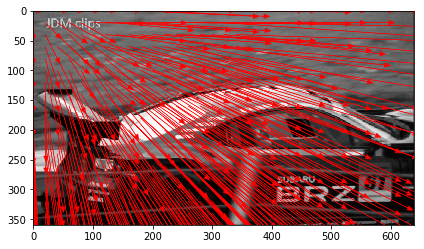

In [68]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from skimage import io, data, feature, color
import numpy as np

# chose other images if you like
lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00001.png')

car1 = io.imread('images/racecar/100.jpeg')
car2 = io.imread('images/racecar/102.jpeg') 

#fig = plt.figure(figsize=(15, 10))



def getSubImages(image,block_groesse):
    bloecke = []
    for i in range(0,image.shape[0]-(image.shape[0]%block_groesse),block_groesse):
        for j in range(0,image.shape[1]-(image.shape[1]%block_groesse),block_groesse):
            bloecke.append((image[i:(i+block_groesse), j:(j+block_groesse)],(i,j)))

    return bloecke


    
#imageCar = image[260:350, 480:640]


def blockMatching(block_groesse,image,image2):
    #bloecke = (image,(x,y))-koord. der linken oberen ecke
    image = color.rgb2grey(image)
    image2 = color.rgb2grey(image2)
    bloecke = getSubImages(image,block_groesse)

    doppelTupel = []
    p = 0
    for block in bloecke:
        doppelTupel.append(findMotion(block[0],block[1][0],block[1][1],image,image2,block_groesse))
        print("progress: ",p)
        p +=1
    return(doppelTupel)
    
def findMotion(aktueller_block,x,y,image,image2,block_groesse):
    u = int(block_groesse*1.5)
    fehlerSummen = []
    for i in range(max(x-u,0),min(x+u,image2.shape[0])-block_groesse):
        for j in range(max(y-u,0),min(y+u,image2.shape[1])-block_groesse):
            fehlerSummen.append((SSD(x,y,i,j,image,image2,block_groesse),(i,j)))
    minimum = fehlerSummen[0]
    minKoordinaten = []
    for fehlerSumme in fehlerSummen[1:]:
        if fehlerSumme[0] < minimum[0]:
            minimum = fehlerSumme
    minKoordinaten = minimum[1]
    return((x,y),minKoordinaten)
    
def SSD(x,y,i,j,image,image2,block_groesse):
    fehlerSumme = 0
    for a in range(block_groesse):
        for b in range(block_groesse):
            fehlerSumme += (image[x+a][y+b] - image2[i+a][j+b])**2
    return(fehlerSumme)
    
            
            
        #for i = um
#def block_matching_step(aktueller_block,car2):

doppelTupel = blockMatching(20,car1,car2)
for dt in doppelTupel:
    plt.arrow(dt[0][0],dt[0][1],dt[1][0],dt[1][1],linewidth=0.4,head_width=8.0,head_length=10.0,color='red')
        

#plt.arrow(10,20,100,300,linewidth=0.4,head_width=8.0,head_length=10.0,color='red')
car=color.rgb2grey(car1)
io.imshow((car))
    

## Ex. 4.2 Harris Corner Detection
* implement the Harris Corner Detector as discussed in the lecture
* compute corners in the first image and track them with Lucas-Kanade (use e.g. the function "calcOpticalFlowPyrLK" in OpenCV)
* mark the positions of your Harris corners and draw the flow vectors found by Lucas-Kanade on the gray-value versions of the first image (**RESULT**)